In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})

In [3]:
import os
os.getcwd()

'/Users/pulkit'

In [4]:
os.chdir('/Users/pulkit/Desktop/python/BigmartSales')

In [5]:
df= pd.read_csv('Train.csv')
df_original= df.copy()

In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


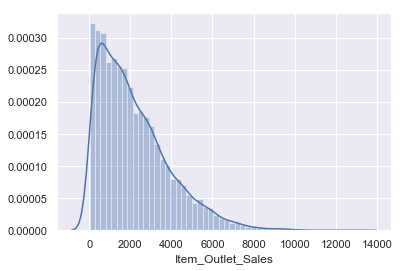

In [10]:
sns.distplot(df['Item_Outlet_Sales'])
# Needs to be normalised 

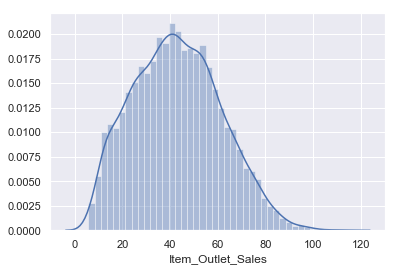

In [11]:
sns.distplot(np.sqrt(df['Item_Outlet_Sales']))

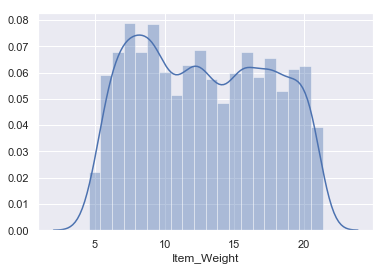

In [12]:
df1= df['Item_Weight'].dropna()
sns.distplot(df1)

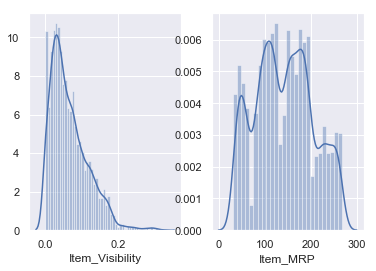

In [13]:
plt.figure()
plt.subplot(121)
sns.distplot(df['Item_Visibility'])
plt.subplot(122)
sns.distplot(df['Item_MRP'])

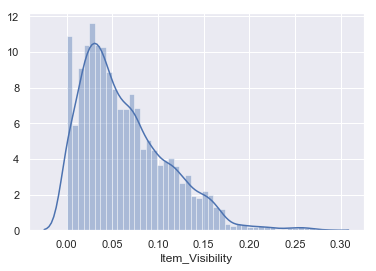

In [14]:
sns.distplot(np.log(df['Item_Visibility']+1))

In [15]:
df['Item_Fat_Content'].replace('LF','Low Fat', inplace= True)
df['Item_Fat_Content'].replace('low fat','Low Fat', inplace= True)
df['Item_Fat_Content'].replace('reg','Regular', inplace= True)

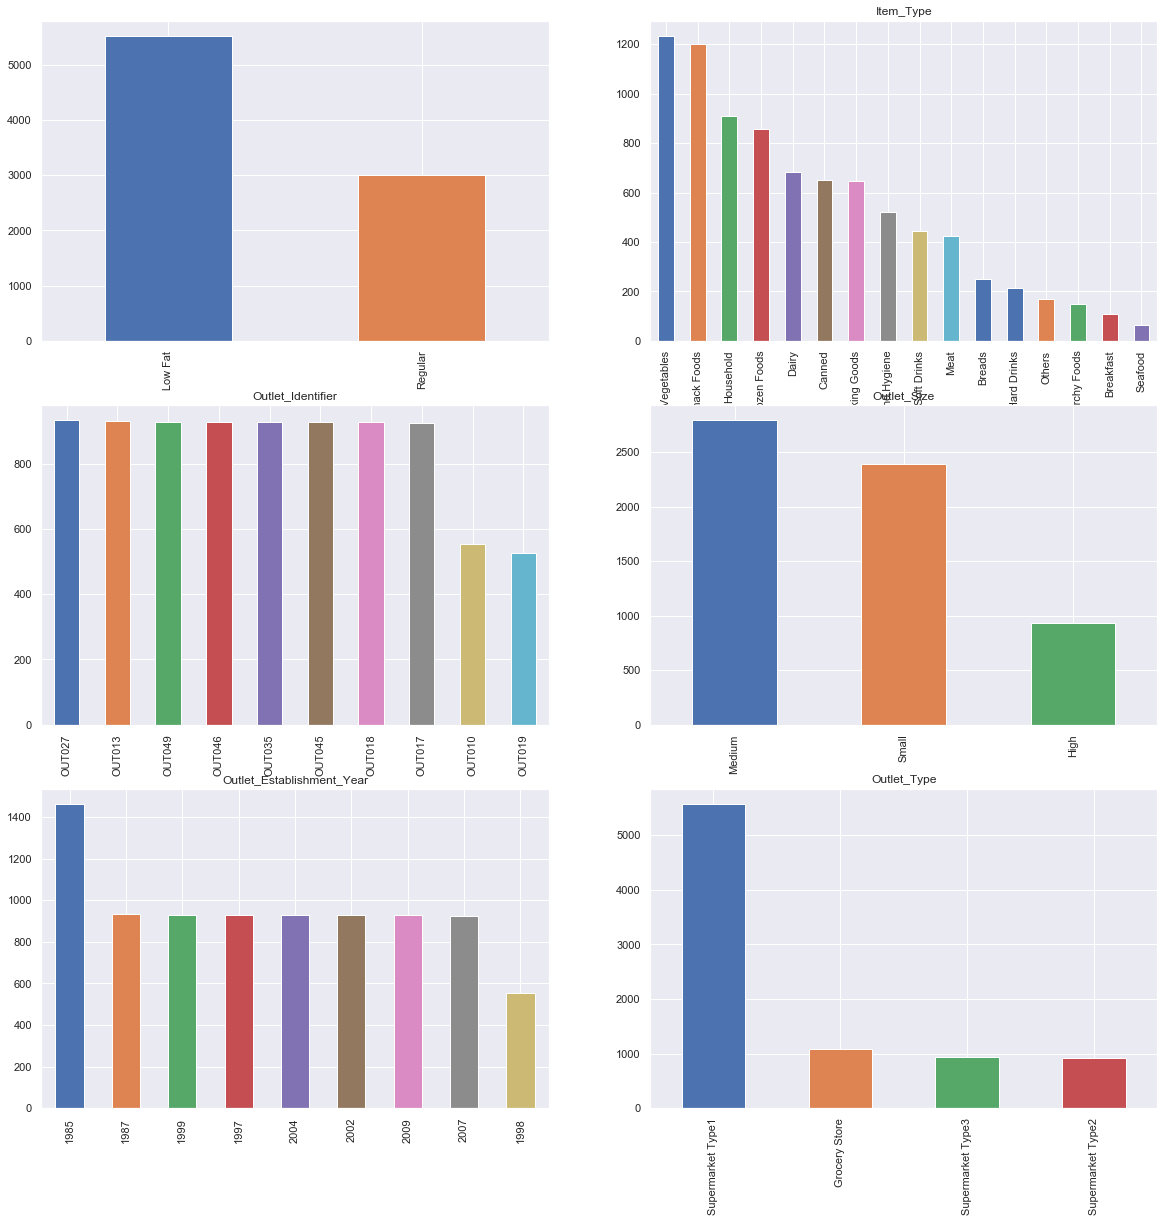

In [16]:
plt.figure()
plt.subplot(321)
df['Item_Fat_Content'].value_counts().plot.bar(figsize= (20,20))
plt.subplot(322)
df['Item_Type'].value_counts().plot.bar(title= 'Item_Type')
plt.subplot(323)
df['Outlet_Identifier'].value_counts().plot.bar(title= 'Outlet_Identifier')
plt.subplot(324)
df['Outlet_Size'].value_counts().plot.bar(title= 'Outlet_Size')
plt.subplot(325)
df['Outlet_Establishment_Year'].value_counts().plot.bar(title= 'Outlet_Establishment_Year')
plt.subplot(326)
df['Outlet_Type'].value_counts().plot.bar(title= 'Outlet_Type')

plt.show()

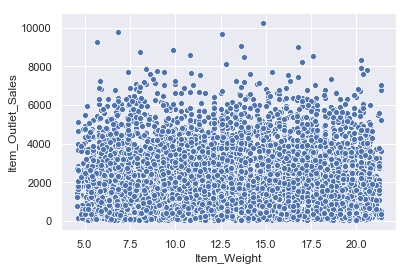

In [17]:
sns.scatterplot(df['Item_Weight'], df['Item_Outlet_Sales'])

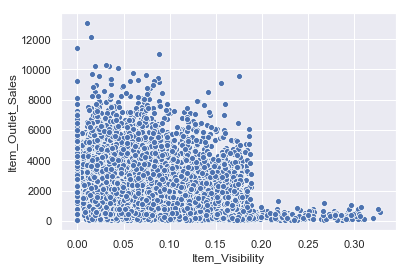

In [18]:
sns.scatterplot(df['Item_Visibility'], df['Item_Outlet_Sales'])

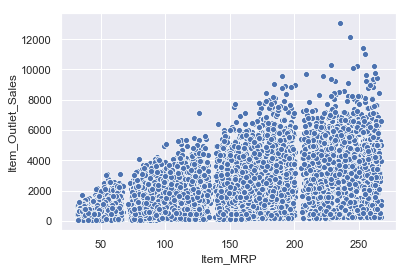

In [19]:
sns.scatterplot(df['Item_MRP'], df['Item_Outlet_Sales'])


In [20]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

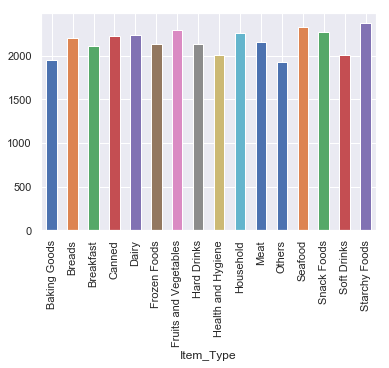

In [21]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.bar()

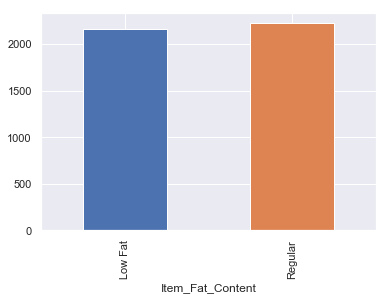

In [22]:
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot.bar()

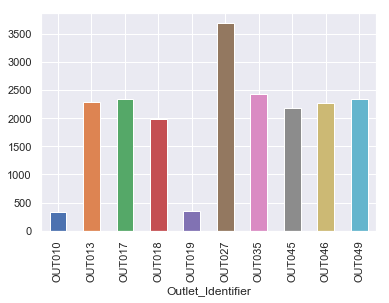

In [23]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().plot.bar()

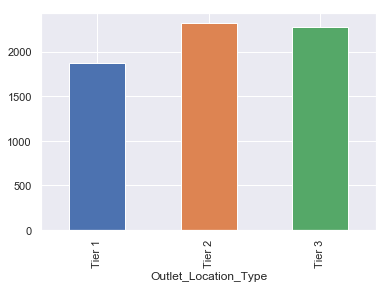

In [24]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar()

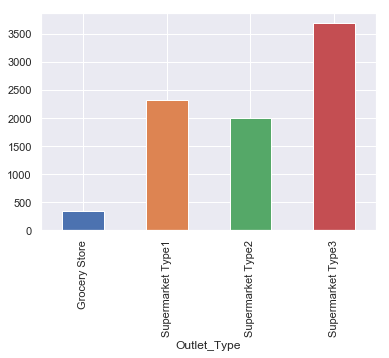

In [25]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()

In [26]:
#filling missing values

In [27]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [28]:
#replacing 0 item_visibility

In [29]:
mean_vis= df['Item_Visibility'].mean()
df['Item_Visibility'].replace(0.000000, mean_vis, inplace=True)

In [30]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [31]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]


In [32]:
bins=[0,69,136,203]
df['Item_MRP']= pd.cut(df['Item_MRP'], bins)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import xgboost
from xgboost import XGBRegressor

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,NaN,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,"(0, 69]",OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,"(136, 203]",OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,"(136, 203]",OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,"(0, 69]",OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
df['Item_MRP'].fillna(df['Item_MRP'].mode()[0], inplace=True)

In [36]:
#preprocessing -- removing skewedness
df['Item_Outlet_Sales']= np.sqrt(df['Item_Outlet_Sales'])
df['Item_Visibility']= np.log(df['Item_Visibility']+1)

In [37]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.015920,Dairy,"(136, 203]",OUT049,1999,Medium,Tier 1,Supermarket Type1,61.115775
1,DRC01,5.92,Regular,0.019095,Soft Drinks,"(0, 69]",OUT018,2009,Medium,Tier 3,Supermarket Type2,21.057607
2,FDN15,17.50,Low Fat,0.016621,Meat,"(136, 203]",OUT049,1999,Medium,Tier 1,Supermarket Type1,45.795961
3,FDX07,19.20,Regular,0.064037,Fruits and Vegetables,"(136, 203]",OUT010,1998,Medium,Tier 3,Grocery Store,27.062520
4,NCD19,8.93,Low Fat,0.064037,Household,"(0, 69]",OUT013,1987,High,Tier 3,Supermarket Type1,31.538947


In [39]:
df.corr()

,Item_Weight,Item_Visibility,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017807,-0.008301,0.010869
Item_Visibility,-0.017807,1.000000,-0.076053,-0.165658
Outlet_Establishment_Year,-0.008301,-0.076053,1.000000,0.007511
Item_Outlet_Sales,0.010869,-0.165658,0.007511,1.000000


In [40]:
from sklearn.preprocessing import LabelEncoder
df= df.apply(LabelEncoder().fit_transform)

x= df.drop('Item_Outlet_Sales',1)
y= df['Item_Outlet_Sales']

x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,284,0,663,4,2,9,4,1,0,1
1,8,57,1,879,14,0,3,8,1,2,2
2,662,376,0,714,10,2,9,4,1,0,1
3,1121,393,1,4432,6,2,0,3,1,2,0
4,1297,265,0,4432,9,0,1,1,0,2,1


In [41]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.3)

In [42]:
kf= StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test= y[train_index], y[test_index]
    clf= LinearRegression()
    clf.fit(x_train, y_train)
    print(clf.score(x_test, y_test))


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.5044794941870616
0.4970891671296757
0.5022405393853141
0.5469006968062673
0.5220497327683278


In [43]:
clf= LinearRegression()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred= clf.predict(x_test)


In [44]:
mse = np.mean((y_pred - y_test)**2)
mse

408314.95345368213

In [45]:
residual= y_pred- y_test

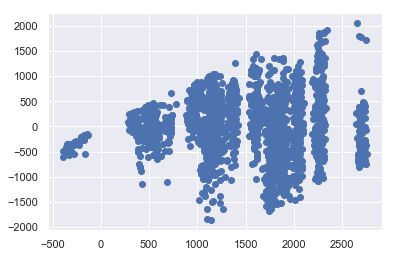

In [46]:
plt.scatter(y_pred, residual)

In [147]:
kf= StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test= y[train_index], y[test_index]
    
    method= RandomForestRegressor()
    method.fit(x_train, y_train)
    print(method.score(x_test, y_test))


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5613052772146259


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5741745440201498


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5516371826094022


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5574039088916596


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.52199567461679


In [149]:
kf= StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test= y[train_index], y[test_index]
    
    method= SVR()
    method.fit(x_train, y_train)
    print(method.score(x_test, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.00445213405747702


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.008734265989235324


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.008376848295957418


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.010159332641460184


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.021175571818784045


In [152]:
kf= StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test= y[train_index], y[test_index]
    
    model= XGBRegressor()
    model.fit(x_train, y_train)
    print(model.score(x_test, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.5760833351166105
0.639605271644659
0.6163323999067425
0.6109098856809319
0.6385304268500169


In [ ]:
x1= x.drop(['Outlet_Location_Type','Outlet_Size', 'Item_Fat_Content' ],1)
x_train, x_test, y_train, y_test= train_test_split(x1,y, test_size=0.3)
model= XGBRegressor()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

pd.Series(model.feature_importances_, index= x1.columns)

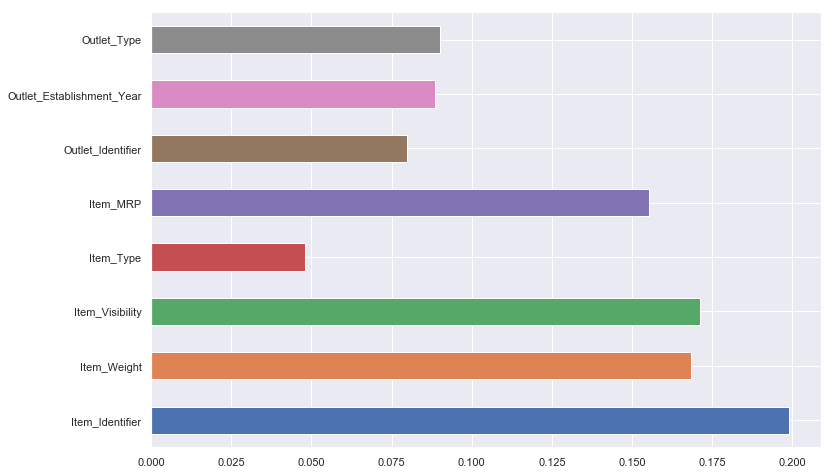

In [54]:
pd.Series(model.feature_importances_, index= x1.columns).plot(kind='barh', figsize= (12,8))

In [ ]:
#directly applying XgBoost on dataset( without any feature engineering)

In [94]:
df1= df_original.copy()
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [80]:
df1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [81]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [95]:
df1['Item_Weight'].fillna(df1['Item_Weight'].mean(), inplace=True)
df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0], inplace=True)

In [96]:
df1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [97]:
from sklearn.preprocessing import LabelEncoder
df1= df1.apply(LabelEncoder().fit_transform)

In [98]:
x1= df1.drop(['Item_Outlet_Sales','Outlet_Size','Outlet_Location_Type'], 1)
y1= df1['Item_Outlet_Sales']

In [88]:
x1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,156,284,1,664,4,5592,9,4,0,1
1,8,57,2,880,14,473,3,8,2,2
2,662,376,1,715,10,2901,9,4,0,1
3,1121,393,2,0,6,4227,0,3,2,0
4,1297,265,1,0,9,627,1,1,2,1


0.6581079638425982


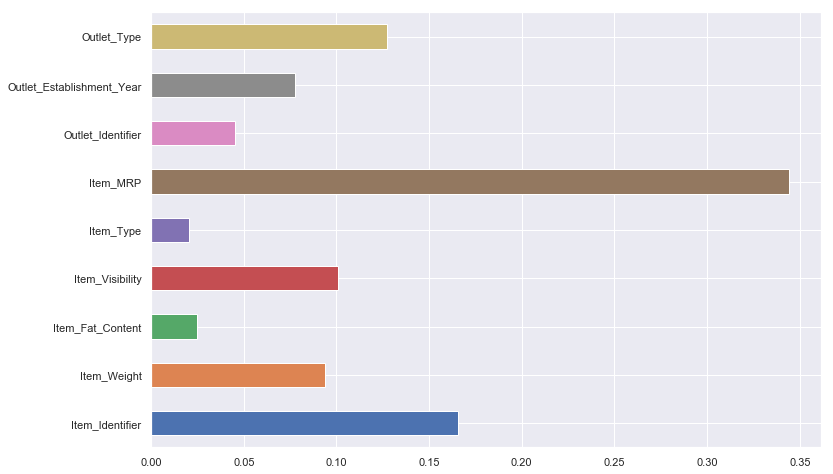

In [101]:
x_train, x_test, y_train, y_test= train_test_split(x1,y1, test_size= 0.3)
clf= XGBRegressor()
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

# pd.Series(clf.feature_importances_, index=x1.columns)

pd.Series(clf.feature_importances_, index=x1.columns).plot(kind='barh', figsize=(12,8))